In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



In [3]:
res = pd.read_csv('platform_economy_mobility.csv')
res.head()
res.shape

(3235, 9)

In [4]:
rev = pd.read_csv('platform_economy_reviews.csv')
rev.head()
rev.shape

(58227, 6)

In [5]:
rev.drop_duplicates()
res.drop_duplicates()


,employee,time,tenure,quit,role,avg_hourly_wage,dma,restaurant,restaurant_cat
0,1,2017-10,5,False,Prep Cook,14.917600,AUSTIN,3,Upscale Casual
1,1,2017-11,6,False,Prep Cook,15.008746,AUSTIN,3,Upscale Casual
2,1,2017-12,7,False,Prep Cook,14.610148,AUSTIN,3,Upscale Casual
3,1,2017-6,1,False,Line Cook,15.906409,AUSTIN,3,Upscale Casual
4,1,2017-7,2,False,Prep Cook,15.393874,AUSTIN,3,Upscale Casual
...,...,...,...,...,...,...,...,...,...
3230,192,2019-2,7,False,Line Cook,16.420945,AUSTIN,15,Fast Casual
3231,192,2019-3,8,False,Line Cook,15.206020,AUSTIN,15,Fast Casual
3232,193,2018-10,1,False,Line Cook,13.934491,AUSTIN,9,Fast Casual
3233,193,2018-11,2,False,Line Cook,15.135345,AUSTIN,9,Fast Casual


In [6]:
print(rev['location'].unique())
print(rev['yelp_review'].unique())

['austin' 'dallas']
['$$' '$$$' '$']


In [7]:
gr = rev.groupby(["time", "location"])
ds = pd.DataFrame(gr.size().reset_index(name="counts"))
ds

,time,location,counts
0,2014-05,austin,245
1,2014-05,dallas,569
2,2014-06,austin,242
3,2014-06,dallas,570
4,2014-07,austin,249
...,...,...,...
117,2019-03,dallas,696
118,2019-04,austin,310
119,2019-04,dallas,676
120,2019-05,austin,317


<ipython-input-8-d2aed12b772b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=90, horizontalalignment="center")


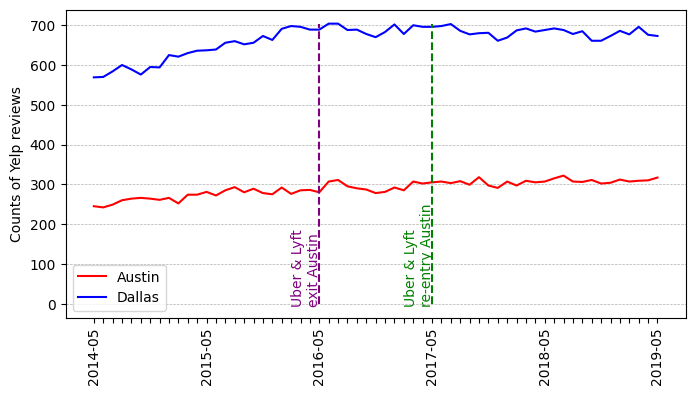

In [8]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
for _, color in zip(["austin", "dallas"], ["red", "blue"]):
    tmp = ds.loc[ds["location"] == _, :]
    ax.plot(
        tmp.time,
        tmp.counts,
        color=color,
        label=_.title(),
    )
    xticklabels = []
for _ in ax.get_xticklabels():
    if "-05" in _.get_text():
        xticklabels.append(_.get_text())
    else:
        xticklabels.append("")
ax.set_ylabel("Counts of Yelp reviews")
ax.set_xticklabels(xticklabels, rotation=90, horizontalalignment="center")
ax.legend(loc="best")
ax.vlines(x="2016-05", ymin=0, ymax=ds["counts"].max(), color="purple", linestyle="--")
ax.text(x="2016-02", y=0, s="Uber & Lyft\nexit Austin", rotation=90, color="purple")
ax.vlines(x="2017-05", ymin=0, ymax=ds["counts"].max(), color="green", linestyle="--")
ax.text(
    x="2017-02", y=0, s="Uber & Lyft\nre-entry Austin", rotation=90, color="green"
)
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.5)
plt.show()

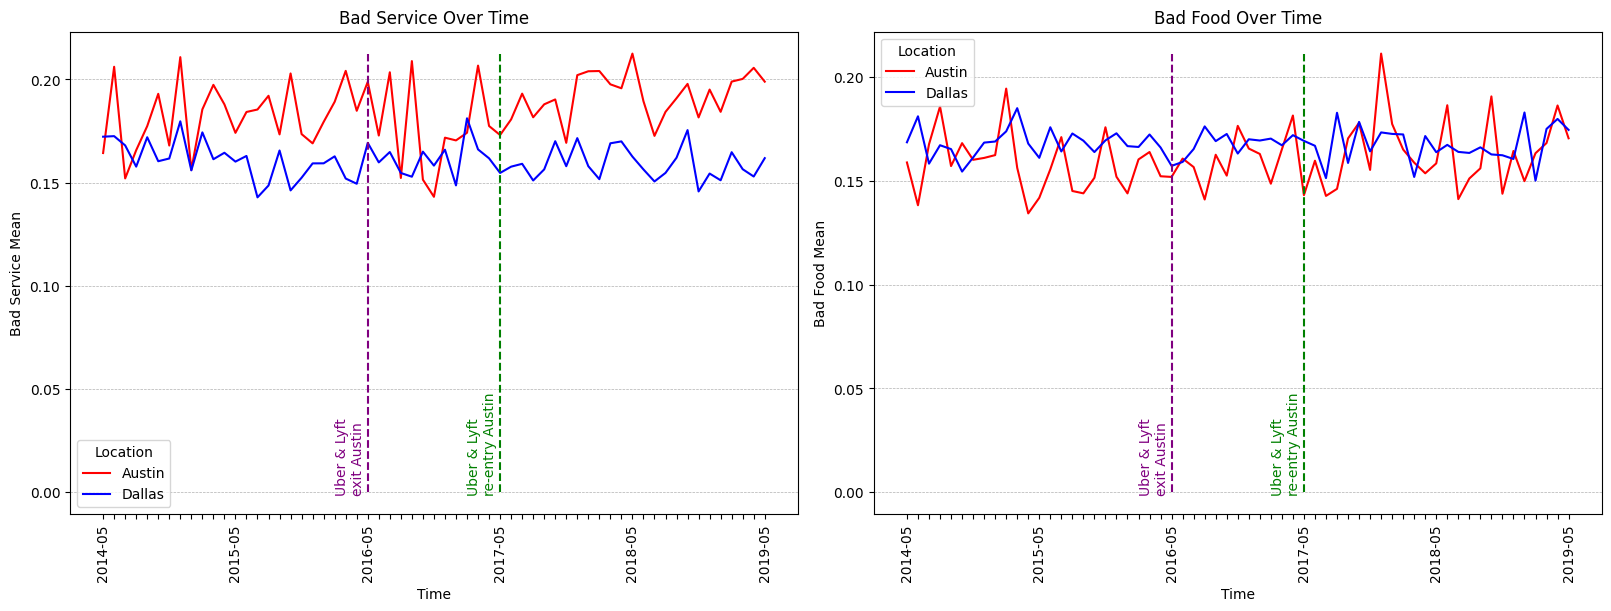

In [9]:
#I want mean of bad service and bad food based on time and location
test = rev.groupby(['time','location'])[['bad_service','bad_food']].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Colors for locations
colors = {"austin": "red", "dallas": "blue"}

# Plot bad_service (left plot)
for location, color in colors.items():
    tmp = test.loc[test["location"] == location, :]
    ax1.plot(
        tmp["time"],
        tmp["bad_service"],
        color=color,
        label=f"{location.title()}",
    )

xticklabels = []
for label in tmp["time"].unique():
    if "-05" in label:
        xticklabels.append(label)
    else:
        xticklabels.append("")
ax1.set_xticks(tmp["time"].unique())
ax1.set_xticklabels(xticklabels, rotation=90, ha="center")
ax1.set_ylabel("Bad Service Mean")
ax1.set_xlabel("Time")
ax1.set_title("Bad Service Over Time")
ax1.legend(title="Location", loc="best")
ax1.vlines(x="2016-05", ymin=0, ymax=test["bad_service"].max(), color="purple", linestyle="--")
ax1.text(x="2016-02", y=0, s="Uber & Lyft\nexit Austin", rotation=90, color="purple")
ax1.vlines(x="2017-05", ymin=0, ymax=test["bad_service"].max(), color="green", linestyle="--")
ax1.text(x="2017-02", y=0, s="Uber & Lyft\nre-entry Austin", rotation=90, color="green")
ax1.grid(True, which="major", axis="y", linestyle="--", linewidth=0.5)

# Plot bad_food (right plot)
for location, color in colors.items():
    tmp = test.loc[test["location"] == location, :]
    ax2.plot(
        tmp["time"],
        tmp["bad_food"],
        color=color,
        label=f"{location.title()}",
    )

ax2.set_xticks(tmp["time"].unique())
ax2.set_xticklabels(xticklabels, rotation=90, ha="center")
ax2.set_ylabel("Bad Food Mean")
ax2.set_xlabel("Time")
ax2.set_title("Bad Food Over Time")
ax2.legend(title="Location", loc="best")
ax2.vlines(x="2016-05", ymin=0, ymax=test["bad_food"].max(), color="purple", linestyle="--")
ax2.text(x="2016-02", y=0, s="Uber & Lyft\nexit Austin", rotation=90, color="purple")
ax2.vlines(x="2017-05", ymin=0, ymax=test["bad_food"].max(), color="green", linestyle="--")
ax2.text(x="2017-02", y=0, s="Uber & Lyft\nre-entry Austin", rotation=90, color="green")
ax2.grid(True, which="major", axis="y", linestyle="--", linewidth=0.5)

plt.show()


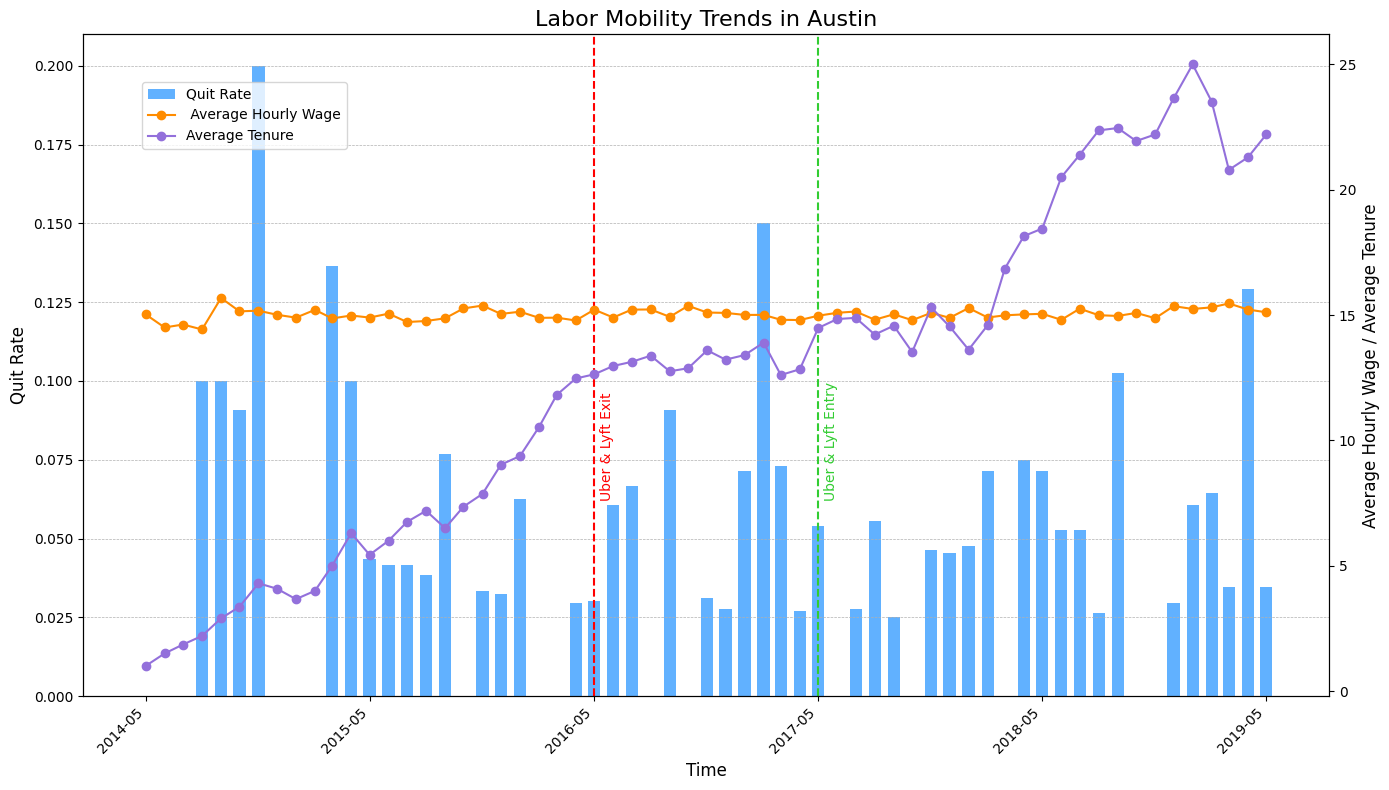

In [10]:
 #Converting the 'time' column to datetime format
res['time'] = pd.to_datetime(res['time'], format='%Y-%m')

#Filter data for Austin only
df_mobility_austin = res[res['dma'] == 'AUSTIN']

# Group by time to calculate average quit rate, hourly wage, and tenure
mobility_trends = df_mobility_austin.groupby('time').agg({
    'quit': 'mean',
    'avg_hourly_wage': 'mean',
    'tenure': 'mean'
}).reset_index()

#Convert 'time' to matplotlib date numbers for precise bar width control
mobility_trends['time_numeric'] = mdates.date2num(mobility_trends['time'])

# Plot Bar Chart with Line Overlay
fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 20

# Plot Quit Rate as bars
ax1.bar(
    mobility_trends['time_numeric'],
    mobility_trends['quit'],
    width=bar_width,
    color='dodgerblue',
    label='Quit Rate',
    alpha=0.7
)

# Customize x-axis for year-05 format
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=5))  # Minor ticks for May
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_xticks([pd.Timestamp(f'{year}-05') for year in mobility_trends['time'].dt.year.unique()])
ax1.set_xticklabels([f'{year}-05' for year in mobility_trends['time'].dt.year.unique()], rotation=45, ha='right')

# Set labels and grid for primary y-axis
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Quit Rate', fontsize=12)
ax1.grid(axis='y', linestyle="--", linewidth=0.5)

# Create a secondary y-axis for Hourly Wage and Tenure
ax2 = ax1.twinx()
ax2.plot(
    mobility_trends['time'],
    mobility_trends['avg_hourly_wage'],
    color='darkorange',
    label=' Average Hourly Wage',
    marker='o'
)
ax2.plot(
    mobility_trends['time'],
    mobility_trends['tenure'],
    color='mediumpurple',
    label='Average Tenure',
    marker='o'
)
ax2.set_ylabel('Average Hourly Wage / Average Tenure', fontsize=12)

# Add Uber & Lyft events as vertical lines with labels
ax1.axvline(pd.Timestamp("2016-05"), color="red", linestyle="--")
ax1.text(pd.Timestamp("2016-05") + pd.Timedelta(days=20),
         ax1.get_ylim()[1]*0.3,
         "Uber & Lyft Exit",
         color="red",
         ha='center',
         rotation=90)

ax1.axvline(pd.Timestamp("2017-05"), color="limegreen", linestyle="--")
ax1.text(pd.Timestamp("2017-05") + pd.Timedelta(days=20),
         ax1.get_ylim()[1]*0.3,
         "Uber & Lyft Entry",
         color="limegreen",
         ha='center',
         rotation=90)

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.title("Labor Mobility Trends in Austin", fontsize=16)
plt.tight_layout()

plt.show()


Flat Tenure Line:

A plateau in tenure means employees are, on average, staying in their roles for a consistent duration.

Quit Rate Trends:

If quit rates are increasing while tenure is flat, this could indicate:
Employees are leaving their jobs faster after a certain tenure period.
Job stability or satisfaction has worsened despite tenure not growing.
If quit rates remain stable or decrease, tenure stability might simply reflect a balanced job market without significant shifts in employment dynamics.

What This Could Mean:

A stable tenure with an increasing quit rate could indicate dissatisfaction or new job opportunities outside the industry.
A stable tenure with a stable or decreasing quit rate could mean the labor market reached equilibrium, where employees are neither quitting more frequently nor staying longer.

In [11]:
#Number of people who quit during the  one yr period when Uber left and they were in which role?


# Define May-to-May grouping bar for every year
def assign_may_to_may_group(date):
    if date.month < 5:  # For months Jan-Apr, assign to the previous year group
        return f"{date.year - 1}-05 to {date.year}-05"
    else:  # For months May-Dec, assign to the current year group
        return f"{date.year}-05 to {date.year + 1}-05"

# Apply May-to-May grouping to new column
res['may_to_may_group'] = res['time'].apply(assign_may_to_may_group)

# Group by May-to-May groups and DMA, summing quits for Austin and Dallas
resgrup_may_to_may = res.groupby(['may_to_may_group', 'dma'])['quit'].sum().reset_index()
resgrup_may_to_may


,may_to_may_group,dma,quit
0,2014-05 to 2015-05,AUSTIN,10
1,2014-05 to 2015-05,DALLAS,3
2,2015-05 to 2016-05,AUSTIN,11
3,2015-05 to 2016-05,DALLAS,9
4,2016-05 to 2017-05,AUSTIN,23
5,2016-05 to 2017-05,DALLAS,14
6,2017-05 to 2018-05,AUSTIN,18
7,2017-05 to 2018-05,DALLAS,16
8,2018-05 to 2019-05,AUSTIN,22
9,2018-05 to 2019-05,DALLAS,27


In [18]:
#Filtering for austin only table
austin_data = res[res['dma'] == 'AUSTIN']

austin_data['may_to_may_group'] = austin_data['time'].apply(assign_may_to_may_group)

# Group by May-to-May groups and role, summing quits for Austin
austin_role_quits_may_to_may = austin_data.groupby(['may_to_may_group', 'role'])['quit'].sum().reset_index()

# Pivot the data to create a matrix for stacking
pivot_austin_role_quits = austin_role_quits_may_to_may.pivot(
    index='may_to_may_group', columns='role', values='quit'
).fillna(0)




<ipython-input-18-078126b159ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austin_data['may_to_may_group'] = austin_data['time'].apply(assign_may_to_may_group)


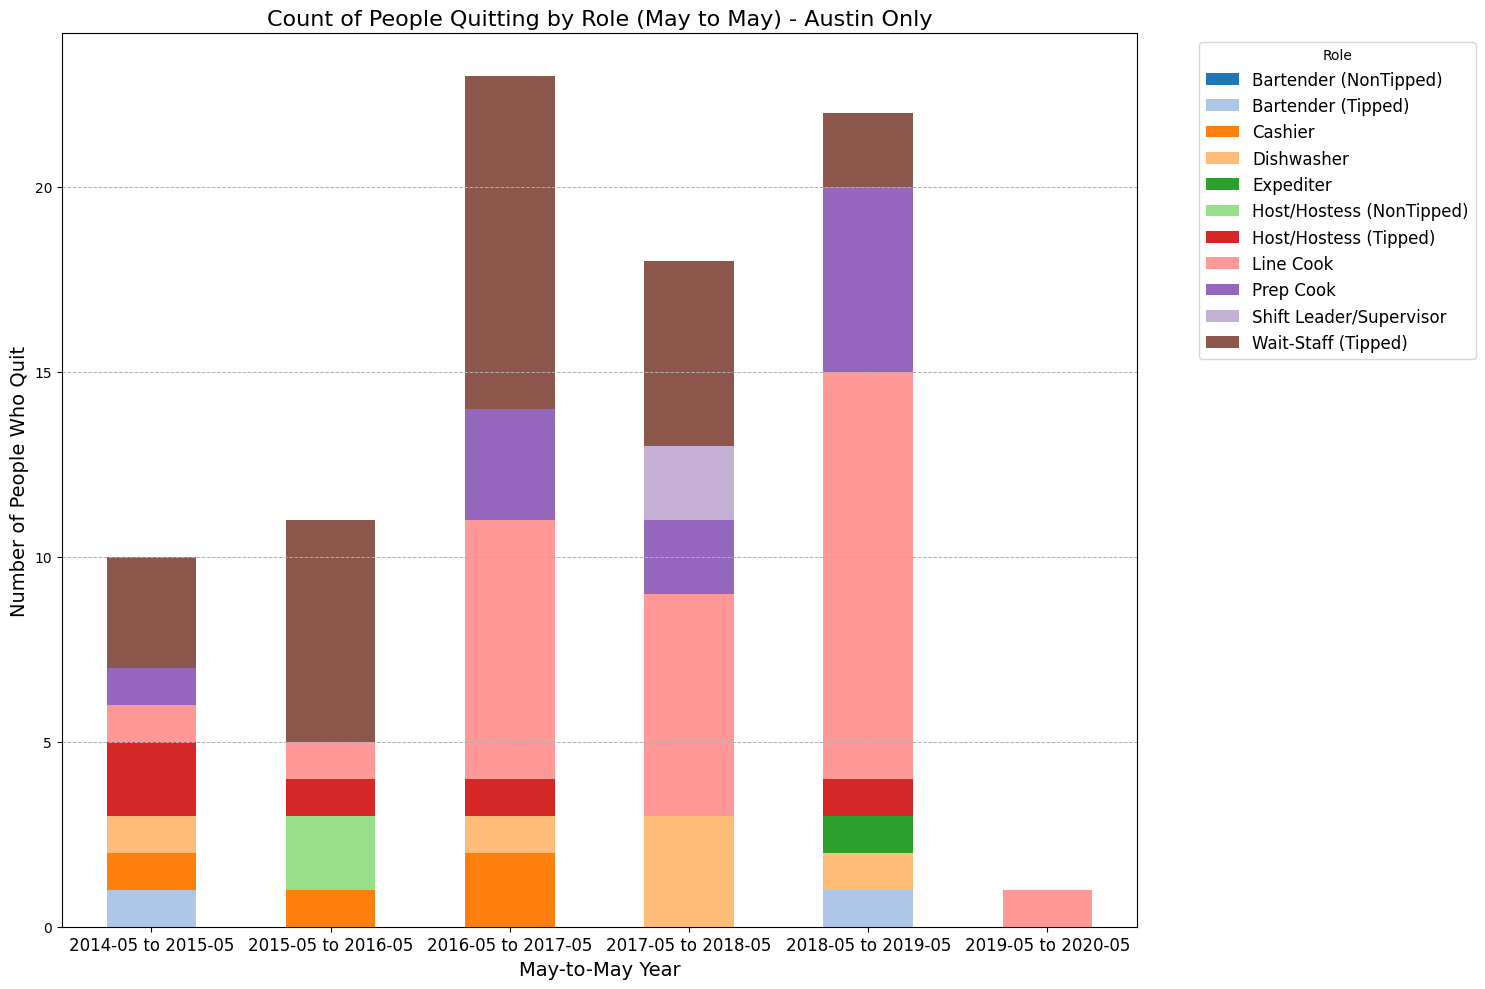

In [15]:
# Plot the stacked bar chart
pivot_austin_role_quits.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 10),
    color=sns.color_palette('tab20', n_colors=len(pivot_austin_role_quits.columns))
)

# Add labels, title, and legend
plt.title("Count of People Quitting by Role (May to May) - Austin Only", fontsize=16)
plt.xlabel("May-to-May Year", fontsize=14)
plt.ylabel("Number of People Who Quit", fontsize=14)

# Update x-ticks to be centered and straight
plt.xticks(
    ticks=range(len(pivot_austin_role_quits.index)),  # Use the range of the index for positions
    labels=pivot_austin_role_quits.index,  # Use the index labels directly
    rotation=0,  # Set rotation to 0 for straight labels
    ha='center',  # Align labels to the center
    fontsize=12
)

# Adjust legend and grid
plt.legend(title="Role", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [14]:
grouped_by_role = res[(res['may_to_may_group'] == '2015-05 to 2016-05') & (res['dma'] == 'AUSTIN')].groupby('role')['quit'].sum()
print(grouped_by_role)
print("Sum across roles:", grouped_by_role.sum())


role
Bartender (Tipped)          0
Cashier                     1
Dishwasher                  0
Host/Hostess (NonTipped)    2
Host/Hostess (Tipped)       1
Line Cook                   1
Prep Cook                   0
Shift Leader/Supervisor     0
Wait-Staff (Tipped)         6
Name: quit, dtype: int64
Sum across roles: 11
